In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load Fashion-MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Use only 2000 images for training, 500 for testing
x_train, y_train = x_train[:2000], y_train[:2000]
x_test, y_test = x_test[:500], y_test[:500]

# Preprocess data
x_train = np.expand_dims(x_train, axis=-1)  # (N, 28,28,1)
x_test = np.expand_dims(x_test, axis=-1)

# Resize to 224x224 and make 3 channels
x_train = tf.image.resize(x_train, (224, 224))
x_test = tf.image.resize(x_test, (224, 224))
x_train = np.repeat(x_train.numpy(), 3, axis=-1)
x_test = np.repeat(x_test.numpy(), 3, axis=-1)

x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
# Custom AlexNet (simplified version for Fashion-MNIST)
def build_alexnet(input_shape=(224,224,3), num_classes=10):
    model = models.Sequential([
        layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((3,3), strides=(2,2)),
        layers.Conv2D(256, (5,5), padding="same", activation='relu'),
        layers.MaxPooling2D((3,3), strides=(2,2)),
        layers.Conv2D(384, (3,3), padding="same", activation='relu'),
        layers.Conv2D(384, (3,3), padding="same", activation='relu'),
        layers.Conv2D(256, (3,3), padding="same", activation='relu'),
        layers.MaxPooling2D((3,3), strides=(2,2)),
        layers.Flatten(),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    return model


In [4]:
# Define models
models_dict = {
    "VGG16": VGG16(weights=None, input_shape=(224,224,3), classes=10),
    "ResNet50": ResNet50(weights=None, input_shape=(224,224,3), classes=10),
    "AlexNet": build_alexnet()
}

histories = {}
results = {}

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# Train each model
for name, model in models_dict.items():
    print(f"\nTraining {name}...")
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test),
                        epochs=5, batch_size=32, verbose=1)
    histories[name] = history
    results[name] = model.evaluate(x_test, y_test, verbose=0)


Training VGG16...
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 134s 1s/step - accuracy: 0.1030 - loss: 2.5335 - val_accuracy: 0.0940 - val_loss: 2.3036
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 47s 541ms/step - accuracy: 0.1130 - loss: 2.3021 - val_accuracy: 0.1040 - val_loss: 2.3032
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 34s 534ms/step - accuracy: 0.1014 - loss: 2.3029 - val_accuracy: 0.1040 - val_loss: 2.3033
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 43s 569ms/step - accuracy: 0.0968 - loss: 2.3451 - val_accuracy: 0.1040 - val_loss: 2.3052
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 38s 528ms/step - accuracy: 0.1156 - loss: 2.3261 - val_accuracy: 0.1040 - val_loss: 2.3036

Training ResNet50...
Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 112s 859ms/step - accuracy: 0.3971 - loss: 2.2414 - val_accuracy: 0.0960 - val_loss: 16.6558
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 82s 353ms/step - accuracy: 0.6823 - loss: 0.9542 - val_accuracy: 0.0720 - val_loss: 6.2059
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 40s 338ms/step - accuracy:

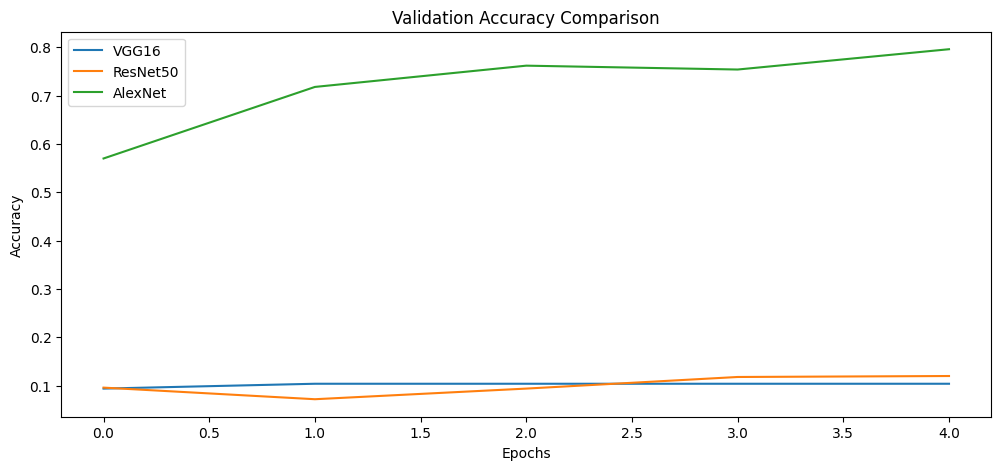

In [6]:
# Plot accuracy curves
plt.figure(figsize=(12,5))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=f"{name}")
plt.title("Validation Accuracy Comparison")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

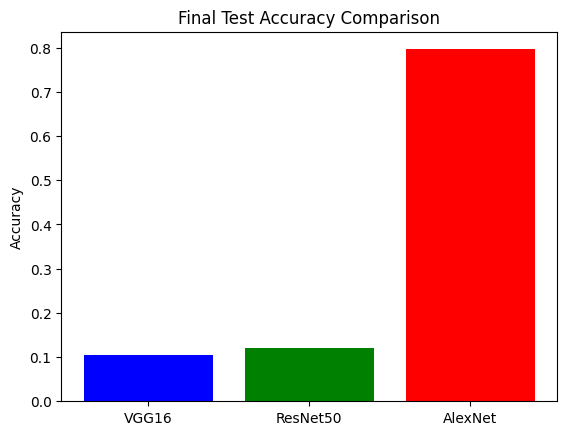

VGG16 - Loss: 2.3036, Accuracy: 0.1040
ResNet50 - Loss: 4.8451, Accuracy: 0.1200
AlexNet - Loss: 0.5641, Accuracy: 0.7960


In [7]:
# Plot bar graph for final accuracy
model_names = list(results.keys())
final_acc = [r[1] for r in results.values()]

plt.bar(model_names, final_acc, color=['blue','green','red'])
plt.title("Final Test Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Print results
for name, (loss, acc) in results.items():
    print(f"{name} - Loss: {loss:.4f}, Accuracy: {acc:.4f}")